In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('train_LZdllcl.csv')

In [3]:
df.shape

(54808, 14)

In [4]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

All variables are categorical

In [6]:
df.isna().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [7]:
df['is_promoted'].value_counts() #unbalanced

,count
is_promoted,
0,50140
1,4668


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()

In [10]:
df.drop('employee_id',axis=1)
for j in list(['department', 'region', 'gender','recruitment_channel']):
    df[j] = le.fit_transform(df[j])

In [11]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,Master's & above,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,Bachelor's,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,Bachelor's,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,Bachelor's,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,Bachelor's,1,0,1,45,3.0,2,0,0,73,0


<Axes: >

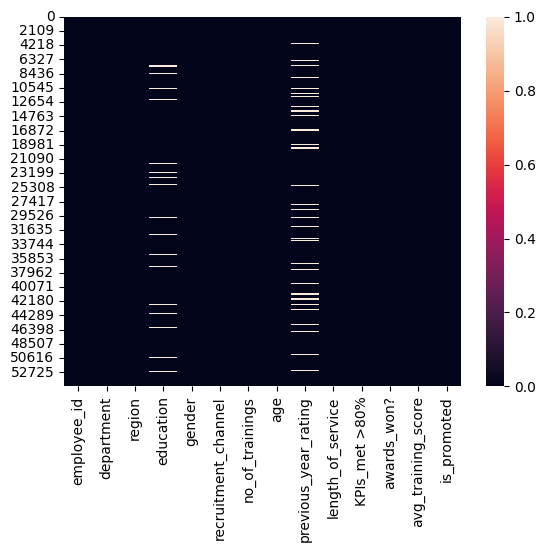

In [12]:
sns.heatmap(df.isna())

In [13]:
def fun_to_label_edu(x):
    x = str(x)
    if x == "Master's & above":
        x = 1
    elif x == "Bachelor's":
        x = 2
    elif x == "Below Secondary":
        x = 3
    return x


In [14]:
df['education'] = df['education'].apply(fun_to_label_edu)

In [15]:
df.loc[df['education']=='nan' , 'education'] = np.nan

<Axes: xlabel='education', ylabel='count'>

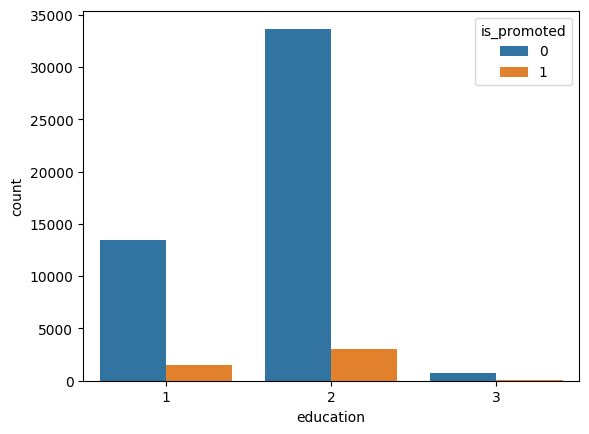

In [19]:
sns.countplot(data=df, x='education', hue='is_promoted')


<Axes: xlabel='department', ylabel='count'>

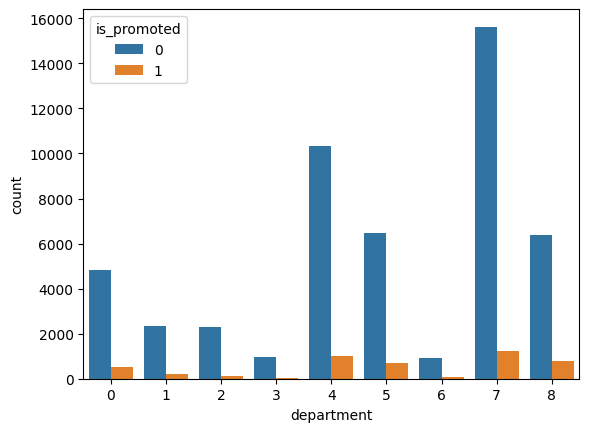

In [24]:
sns.countplot(data=df ,x='department',hue='is_promoted')

<Axes: xlabel='age', ylabel='count'>

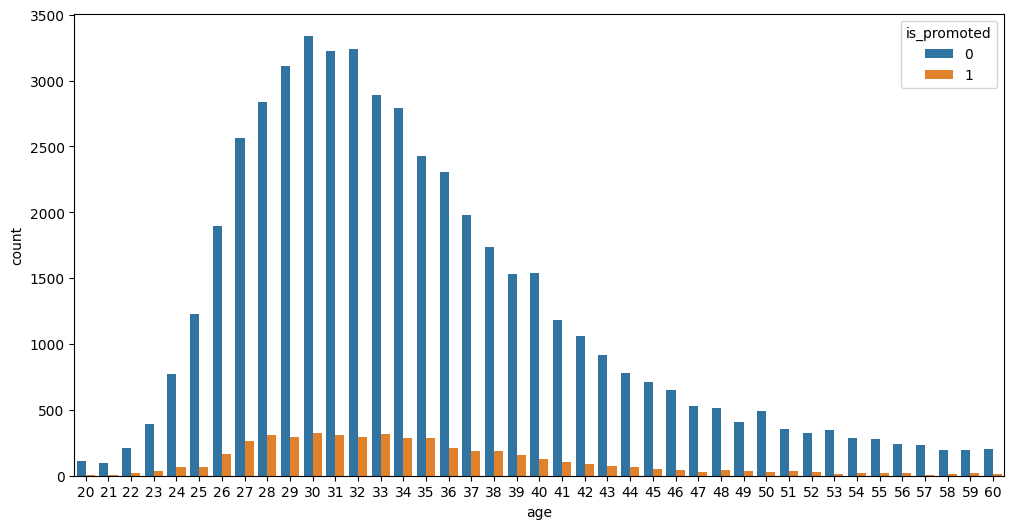

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(data=df ,x='age',hue='is_promoted')

<Axes: xlabel='gender', ylabel='count'>

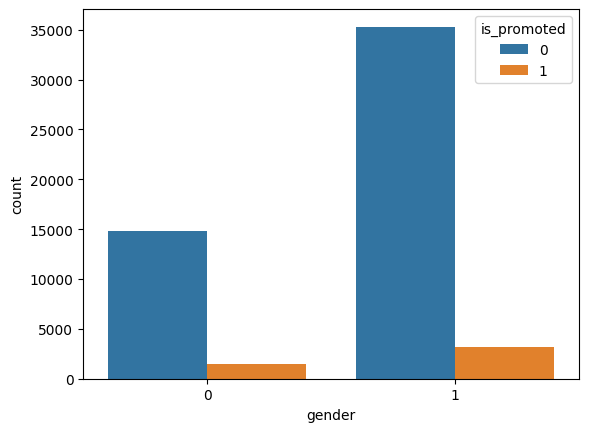

In [27]:
sns.countplot(data=df ,x='gender',hue='is_promoted')

## A very quick solution with SVC:


Naive Bayes cannot work with missing values - so we need to either remove them or impute them.

In [28]:
# Attempt -1 : dropping missing value rows
df_drop = pd.DataFrame(df.values , columns = df.columns)
df_drop = df_drop.dropna(axis=0)
df_drop.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,1,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,2,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,2,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,2,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,2,1,0,1,45,3.0,2,0,0,73,0


In [29]:
df_drop.isna().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


In [30]:
target = 'is_promoted'
IDcol = 'employee_id'

predictors = [x for x in df.columns if x not in [target, IDcol]]
df_drop = df_drop.astype({'is_promoted' : 'int64'})
for p in predictors:
    df_drop = df_drop.astype({p : 'float'})

In [31]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import svm
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve

X_train, X_test, y_train, y_test = train_test_split(df_drop[predictors], df_drop[target], test_size=0.3,random_state=109) # 70% training and 30% test

In [35]:
def svc_param_selection(X, y, nfolds):
    Cs = [ 0.01, 1]
#     gammas = [ 0.1, 1]
    param_grid = {'C': Cs}
    grid_search = GridSearchCV(svm.SVC(kernel='linear'), param_grid, cv=nfolds, scoring = 'roc_auc',n_jobs=4)
    grid_search.fit(X, y)
    print(grid_search.best_params_ , grid_search.best_score_)



In [37]:
svc_param_selection(X_train,y_train,5)

{'C': 1} 0.7357861985906039


In [38]:
#the model

## XGBoost solution with parameter tuning

In [39]:
df = df.astype({'education' : 'float'})

In [40]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.model_selection import GridSearchCV   #Perforing grid search
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve


In [41]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [43]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):

    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])

    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['is_promoted'],eval_metric='auc')

    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]

    #Print model report:
    print("\nModel Report")

    print("Accuracy : %.4g" % accuracy_score(dtrain['is_promoted'].values, dtrain_predictions))
    print("AUC Score (Train): %f" % roc_auc_score(dtrain['is_promoted'], dtrain_predprob))

    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [44]:
train = df

In [51]:
target = 'is_promoted'
IDcol = 'employee_id'

# Define the predictors (excluding target and ID column)
predictors = [x for x in df.columns if x not in [target, IDcol]]

# Define the XGBoost model
xgb1 = XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    n_jobs=4,
    scale_pos_weight=1,
    seed=27
)

# Define the modelfit function
def modelfit(alg, train, predictors):
    # Prepare training data
    X_train = train[predictors]
    y_train = train[target]

    # Fit the model with eval_metric passed correc
    # Output the model accuracy or other metrics

# Call modelfit function
modelfit(xgb1, df, predictors)


In [53]:
param_test1 = {
 'max_depth':range(4,6,1),
 'min_child_weight':range(1,3,1)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27),
 param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(train[predictors],train[target])
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 5, 'min_child_weight': 1}, 0.9088938319936632)

In [54]:
xgb1.get_xgb_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.8,
 'device': None,
 'eval_metric': None,
 'gamma': 0,
 'grow_policy': None,
 'interaction_constraints': None,
 'learning_rate': 0.1,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 5,
 'max_leaves': None,
 'min_child_weight': 1,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_jobs': 4,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': 1,
 'subsample': 0.8,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'seed': 27}

In [55]:
# Lets go one step deeper and look for optimum values
# param_test2 = {
#  'max_depth':[4,5,6],
#  'min_child_weight':[4,5,6]
# }
# gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
#  min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
#  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27),
#  param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
# gsearch2.fit(train[predictors],train[target])
# gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

In [57]:
# Step 3: Tune gamma

param_test3 = {
 'gamma':[i/10.0 for i in range(0,4)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27),
 param_grid = param_test3, scoring='roc_auc',n_jobs=4, cv=5)
gsearch3.fit(train[predictors],train[target])
gsearch3.best_params_, gsearch3.best_score_

({'gamma': 0.2}, 0.9072576391850664)

In [58]:
#improved model

xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=100,
 max_depth=5,
 min_child_weight=2,
 gamma=0.3,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb2, train, predictors)

In [ ]:

# Step 4: Tune subsample and colsample_bytree

# param_test4 = {
#  'subsample':[i/10.0 for i in range(6,10)],
#  'colsample_bytree':[i/10.0 for i in range(6,10)]
# }
# gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
#  min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
#  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27),
#  param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
# gsearch4.fit(train[predictors],train[target])
# gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_


In [60]:
# Step 5: Tuning Regularization Parameters - to reduce overfitting which might be happening in this case

# initially try on a broader range
param_test6 = {
 'reg_alpha':[1e-2, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=5,
 min_child_weight=2, gamma=0.3, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27),
 param_grid = param_test6, scoring='roc_auc',n_jobs=4, cv=5)
gsearch6.fit(train[predictors],train[target])
gsearch6.best_params_, gsearch6.best_score_

({'reg_alpha': 0.01}, 0.9088217642858032)

In [61]:
# now on a closer range
param_test6 = {
 'reg_alpha':[0.1,10]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=5,
 min_child_weight=2, gamma=0.3, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27),
 param_grid = param_test6, scoring='roc_auc',n_jobs=4, cv=5)
gsearch6.fit(train[predictors],train[target])
gsearch6.best_params_, gsearch6.best_score_

({'reg_alpha': 0.1}, 0.9086882123491618)

In [62]:
# Training this parameter since we have a class imbalance problem
param_test7 = {'scale_pos_weight' : [1,2,3]}

gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=5,
min_child_weight=2, gamma=0.3, subsample=0.8, colsample_bytree=0.8,
objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27),
param_grid = param_test7, scoring='roc_auc',n_jobs=4,cv=5)
gsearch7.fit(train[predictors],train[target])
gsearch7.best_params_, gsearch7.best_score_


({'scale_pos_weight': 2}, 0.9088163195587178)

In [63]:
# Now we can apply this regularization in the model and look at the impact:

xgb3 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=100,
 max_depth=5,
 min_child_weight=2,
 gamma=0.3,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.1,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=3,
 seed=27)
modelfit(xgb3, train, predictors)

# Step 6: Reducing Learning Rate



In [64]:
xgb3.get_xgb_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.8,
 'device': None,
 'eval_metric': None,
 'gamma': 0.3,
 'grow_policy': None,
 'interaction_constraints': None,
 'learning_rate': 0.1,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 5,
 'max_leaves': None,
 'min_child_weight': 2,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': 0.1,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': 3,
 'subsample': 0.8,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'nthread': 4,
 'seed': 27}

In [66]:
# test the model on test dataset

df_test = pd.read_csv('test_2umaH9m.csv')

In [67]:
# same pre processing steps applied on test data

le1 = LabelEncoder()
df_test.drop('employee_id',axis=1)

for j in list(['department', 'region', 'gender','recruitment_channel']):
    df_test[j] = le1.fit_transform(df_test[j])

df_test['education'] = df_test['education'].apply(fun_to_label_edu)
df_test.loc[df_test['education']=='nan' , 'education'] = np.nan
df_test = df_test.astype({'education' : 'float'})

In [68]:
df_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,8,18,2.0,1,2,1,24,NaN,1,1,0,77
1,74430,2,28,2.0,0,0,1,31,3.0,5,0,0,51
2,72255,7,4,2.0,1,0,1,31,1.0,4,0,0,47
3,38562,5,11,2.0,0,0,3,31,2.0,9,0,0,65
4,64486,1,21,2.0,1,2,1,30,4.0,7,0,0,61


In [69]:
df_test.dtypes

,0
employee_id,int64
department,int64
region,int64
education,float64
gender,int64
recruitment_channel,int64
no_of_trainings,int64
age,int64
previous_year_rating,float64
length_of_service,int64


In [73]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,1.0,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,2.0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,2.0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,2.0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,2.0,1,0,1,45,3.0,2,0,0,73,0


In [90]:
# same pre processing steps applied on test data

le1 = LabelEncoder()
# df_test.drop('employee_id',axis=1) # this line does not modify df_test inplace

for j in list(['department', 'region', 'gender','recruitment_channel']):
    df_test[j] = le1.fit_transform(df_test[j])

df_test['education'] = df_test['education'].apply(fun_to_label_edu)
df_test.loc[df_test['education']=='nan' , 'education'] = np.nan
df_test['education'] = df_test['education'].astype(float) # Convert 'education' to float
# df_test = df_test.astype({'education' : 'float'}) # previously, some values are 'nan' strings

In [92]:
#conversion to csv file
submission = pd.DataFrame()
submission['employee_id'] = df_test['employee_id']

# Generate predictions using your trained model (e.g., xgb3)
dtest_predictions = xgb3.predict(df_test[predictors]) # Use the appropriate model and features

submission['is_promoted'] = dtest_predictions
submission.set_index('employee_id', inplace=True)

submission.head()

,is_promoted
employee_id,
8724,0
74430,0
72255,0
38562,0
64486,0


In [93]:
submission.to_csv("HR Problem AV.csv")

In [94]:
len(submission)

23490

In [95]:
def bin_age(df,i):
    df1 = pd.DataFrame(df.values,columns =df.columns.to_list())
    df1.loc[df1[i]>55,i] = 3
    df1
    return df1


In [ ]:
# df1 = bin_age(df,'age')

In [ ]:
# sns.countplot(df['age'])

In [96]:
from imblearn.pipeline import make_pipeline as make_pipeline_imb # To do our transformation in a unique time

In [97]:
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve

In [98]:
# Attempt -1 : dropping missing value rows
df_drop = pd.DataFrame(train.values , columns = train.columns)
df_drop = df_drop.dropna(axis=0)
df_drop.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438.0,7.0,31.0,1.0,0.0,2.0,1.0,35.0,5.0,8.0,1.0,0.0,49.0,0.0
1,65141.0,4.0,14.0,2.0,1.0,0.0,1.0,30.0,5.0,4.0,0.0,0.0,60.0,0.0
2,7513.0,7.0,10.0,2.0,1.0,2.0,1.0,34.0,3.0,7.0,0.0,0.0,50.0,0.0
3,2542.0,7.0,15.0,2.0,1.0,0.0,2.0,39.0,1.0,10.0,0.0,0.0,50.0,0.0
4,48945.0,8.0,18.0,2.0,1.0,0.0,1.0,45.0,3.0,2.0,0.0,0.0,73.0,0.0


In [100]:
# build model with SMOTE imblearn
smote_pipeline = make_pipeline_imb(SMOTE(random_state=4), \
                                   xgb5)

# Replace as_matrix() with .values
smote_model = smote_pipeline.fit(X_train.values, y_train.values)
smote_prediction = smote_model.predict(X_test.values)

# print("Confusion Matrix: ")
# print(confusion_matrix(y_test, smote_prediction))

print('\nSMOTE Pipeline Score {}'.format(smote_pipeline.score(X_test.values, y_test.values)))

print_results("\nSMOTE + xgboost classification", y_test.values, smote_prediction)

# as_matrix() was done as a workaround to combat a bug in smote : it does not accept dataframe
# (need to convert into numpy matrix)


SMOTE Pipeline Score 0.8477188655980271

SMOTE + xgboost classification
precision: 0.30920245398773005
recall: 0.586046511627907
f2: 0.4970414201183432


In [101]:
#As we can see, the accuracy has considerably decreased